<a href="https://colab.research.google.com/github/alves05/Taxa-de-Retorno-de-Acoes-Python/blob/main/Taxa_de_retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo da Taxa de Retorno de ações

A taxa de retorno mede a valorização de um determinado investimento, assim como o recebimento de renda durante a posse dessa aplicação. É possível calcular essa taxa para investimentos de renda fixa e também para ações, fundos imobiliários, e qualquer outro tipo.

Aqui vamos aplicar o calculo da taxa de retorno em uma carteira de ações de areas diferentes da economia e vamos comparar a com o BOVA11.

### Importações das bibliotecas e do dataset

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# Carregando dataset
dataset_ex = pd.read_csv('acoes_ex.csv')
dataset_ex

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,13.720000,14.00,43.480000,19.860001,32.779999,95.800003
1442,2020-10-28,13.370000,12.97,42.610001,18.639999,31.139999,92.430000
1443,2020-10-29,12.890000,12.84,42.250000,19.330000,30.959999,92.910004
1444,2020-10-30,12.180000,12.61,42.669998,19.000000,29.799999,90.660004


### Taxa de retorno da carteira

In [3]:
# Normalização do dataset para analisar a taxa de crescimento
dataset_normalizado = dataset_ex.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])
dataset_normalizado.head()

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449


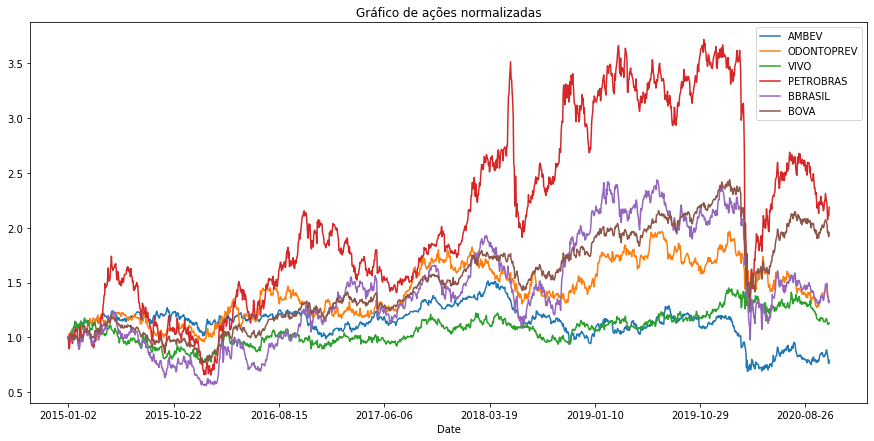

In [4]:
# Gerando gráfico normalizado
dataset_normalizado.plot(x='Date', figsize=(15,7), title='Gráfico de ações normalizadas');

In [5]:
# Apagando a coluna 'Date'
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [6]:
# Calculando a taxa de retorno das ações
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.019831,-0.081111,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.025393,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.048387,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.067456,0.003407,0.007477


In [7]:
# Calulando o retorno anual das ações
retorno_anual = (retorno_carteira.mean() * 246)
retorno_anual

AMBEV        -0.003055
ODONTOPREV    0.098360
VIVO          0.071963
PETROBRAS     0.276396
BBRASIL       0.159670
BOVA          0.151077
dtype: float64

In [8]:
# Retornando no formato de porcentagem
retorno_anual = retorno_anual * 100
retorno_anual

AMBEV         -0.305458
ODONTOPREV     9.835984
VIVO           7.196278
PETROBRAS     27.639591
BBRASIL       15.967003
BOVA          15.107699
dtype: float64

In [9]:
# Definindo os pesos para cada uma das ações excluindo a BOVA
pesos_carteira = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [10]:
# Verificando
# o pesos_carteira1 tem que totalizar 1.0
pesos_carteira.sum()

1.0

In [11]:
# Calculo do retorno da carteira
np.dot(retorno_anual, pesos_carteira)

12.066679602082445

### Gráfico Carteira vs BOVA

In [12]:
# Carregando dataset
dataset = pd.read_csv('acoes_ex.csv')
dataset.head()

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.00,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.27,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.06,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.45,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.02,23.559999,48.509998


In [13]:
# Normalização do dataset para analisar a taxa de crescimento
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])
dataset_normalizado.head()

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449


In [14]:
# Criando uma nova coluna com a media das ações da carteira sem a BOVA
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['AMBEV'] + dataset_normalizado['ODONTOPREV'] + dataset_normalizado['VIVO'] + dataset_normalizado['PETROBRAS'] + dataset_normalizado['BBRASIL']) / 5
dataset_normalizado.head()

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110,0.977377
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612,0.976579
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832,1.006405
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449,1.026926


In [15]:
# Gráfico
figura = px.line(title='CARTEIRA vs BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x=dataset_normalizado['Date'], y=dataset_normalizado[i], name=i)
figura.show()

In [16]:
# Deixando apenas as colunas BOVA e CARTEIRA
dataset_normalizado.drop(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BBRASIL'], axis = 1, inplace = True)
dataset_normalizado.head()

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.977377
2,2015-01-06,0.985612,0.976579
3,2015-01-07,1.018832,1.006405
4,2015-01-08,1.026449,1.026926


In [18]:
# Gráfico CARTEIRA vs BOVA
figura = px.line(title='CARTEIRA vs BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x=dataset_normalizado['Date'], y=dataset_normalizado[i], name=i)
figura.show()